# Computer Assignment 3: Decision Tree Algorithms

This is a machine learning exercise that involves building a decision tree algorithm for a dataset containing salaries of people along with seven demographic variables. The dataset contains 48,842 rows and 7 columns. The objective is to classify the data into two categories of income based on the demographic variables. Before building the model, the data quality of the dataset is analyzed for missing values, outliers, and NaNs, and the necessary data cleansing and transformation is performed. The decision tree classifier model is built using the DecisionTreeClassifier algorithm from scikit learn. The decision tree's performance is evaluated by calculating the confusion matrix, accuracy, precision, recall, and F1 score. The decision tree's hyper-parameters are varied, and the performance is compared to determine the best-performing tree with respect to accuracy.

In [105]:
# Install and import programs to be used

import pandas as pd
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier


url = "https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true"

df = pd.read_csv(url)

df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


**NB If you receive this error _AttributeError: module 'numpy.random' has no attribute 'Generator'_ after implementing the below solutions, make sure to restart your Kernel.**

**If you are having compatibility issues with the versions of Pandas and Numpy installed in your Kernel.** 
The error seems to be caused by a compatibility issue between the current version of Pandas and the version of NumPy installed. The numpy.random.Generator attribute used by Pandas is not available in the older version of NumPy that you installed. You can try updating Pandas or installing a more recent version of NumPy.

**If problem requires you to downgrade your version.**
One way to fix this issue is to downgrade the version of NumPy to a compatible one using !pip install numpy==1.21.2, which is compatible with Pandas 1.3.3.

After downgrading NumPy, you can try importing Pandas again and see if the issue is resolved.

**If problem requires you to upgrade your version.**
The AttributeError: module 'numpy.random' has no attribute 'Generator' error usually occurs when you are using an older version of NumPy that does not have the Generator class. You can fix this error by upgrading NumPy to the latest version. You can do this by running the following command in a code cell: 

!pip install --upgrade numpy




## Section 2: Data Quality Analysis

In this section we perform Data Exploration and Analysis, which includes the following; 
* Perform data quality analysis to find missing values, outliers, NaNs etc.
* Display descriptive statistics of each column
* Create a Data Quality Report
* Perform necessary data cleansing and transformation based on your observations from the data quality analysis


In [106]:
# Convert to CSV for view in Excel
df.to_csv('df.csv', index=False)

In [107]:
# Print first few rows to get a visual
print(df.head())

# Print the shape so we have an idea of the size of the data set
print(df.shape)

# Print the details of each column and the data type
print(df.info())

# Based on the output below, there are no missing values. 
# There are 48842 rows and 11 columns. 
# All columns are Dtype 'Object' with exception to 'y', which has int64 values. 

  hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0           b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1            a. 0-30        e. High  c. High         a. = 0      c. High   
2           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4           b. 31-40        e. High  c. High         a. = 0       a. Low   

  education_num_bin education_bin workclass_bin            age_bin   flag  y  
0             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  train  0  
1             c. 13  c. Bachelors     b. income           e. 40-55  train  0  
2           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train  0  
3            a. 0-8        a. Low     b. income           e. 40-55  train  0  
4             c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  train  0  
(48842, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 e

## Data Cleaning Section and Reflection upto Train and Test

After getting errors at the train and test stage when I tried to implement the Decision Tree Classifier, I discovered that my notebook had the following issues;

1. Some of the column names have spaces in them, which can cause problems when trying to refer to them in code. It's generally good practice to avoid spaces in column names and replace them with underscores instead.

2. The column flag appears to have values of "train" and "test", which are strings. To use these values to split the data into training and testing sets, you will need to encode them as numerical values, using a method like LabelEncoder from scikit-learn.

3. Some of the categorical columns in the data, such as hours_per_week_bin and occupation_bin, have categories with spaces in their names, which can also cause issues when working with the data. It might be better to remove the spaces from these categories and replace them with underscores instead.

4. There are missing values in the data, which could cause problems when training and evaluating a model. It's important to handle missing data appropriately, by either imputing the missing values or removing the corresponding rows or columns from the data.

Now I will attempt to correct some of these errors.

In [108]:
# Create a copy of the data frame.
df_backup = df.copy()

# Check for missing values
print(df.isna().sum())

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64


In [109]:
# Install visualization packages Matplotlib and Seaborn
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns



In [110]:
# Print-out of a list of the unique categories in each column. 
print(df.columns, '\n')

print(df.hours_per_week_bin.unique(), '\n')
print(df.occupation_bin.unique(), '\n')
print(df.msr_bin.unique(), '\n')
print(df.capital_gl_bin.unique(), '\n')
print(df.race_sex_bin.unique(), '\n')
print(df.education_num_bin.unique(), '\n')
print(df.education_bin.unique(), '\n')
print(df.workclass_bin.unique(), '\n')
print(df.age_bin.unique(), '\n')
print(df.flag.unique(), '\n')
print(df.y.unique(), '\n')


Index(['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin', 'flag', 'y'],
      dtype='object') 

['b. 31-40' 'a. 0-30' 'd. 41-50 & 61-70' 'c. 71-100' 'e. 51-60'] 

['b. Mid - Low' 'e. High' 'a. Low' 'c. Mid - Mid' 'd. Mid - High'] 

['b. Mid' 'c. High' 'a. Low'] 

['c. > 0' 'a. = 0' 'b. < 0'] 

['c. High' 'b. Mid' 'a. Low'] 

['c. 13' 'b. 9-12' 'a. 0-8' 'd. 14' 'e. 15+'] 

['c. Bachelors' 'b. Mid' 'a. Low' 'd. Masters' 'e. High'] 

['b. income' 'a. no income'] 

['d. 36-40 & 56-60' 'e. 40-55' 'b. 26-30 & 71-100' 'c. 31-35 & 61-70'
 'a. 0-25'] 

['train' 'test'] 

[0 1] 



### Visualizations to get an idea of the distribution of the various categorical fields. 

In [111]:
# Print out for easy reference to the columns.
print(df.columns, '\n')

Index(['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin', 'flag', 'y'],
      dtype='object') 



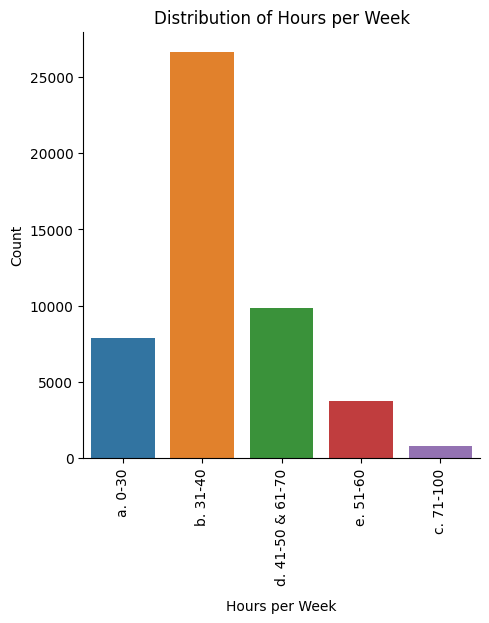

In [112]:
# Explore distribution in 'hours_per_week_bin' variable.

hours_categ_order = ['a. 0-30', 'b. 31-40', 'd. 41-50 & 61-70', 'e. 51-60', 'c. 71-100']

sns.catplot(x='hours_per_week_bin', data=df, kind='count', order=hours_categ_order)
plt.xticks(rotation=90)
plt.title('Distribution of Hours per Week')
plt.xlabel('Hours per Week', labelpad = 10)
plt.ylabel('Count')
plt.show()

# Firstly, I re-arranged the order so the ages increase from left to right. However, the 41-50 & 61-70 
# were grouped together. This is not intuitive and could misrepresent the findings if there is not relationship
# between these groups.
# Majority of the observations are in the age group 31-40.

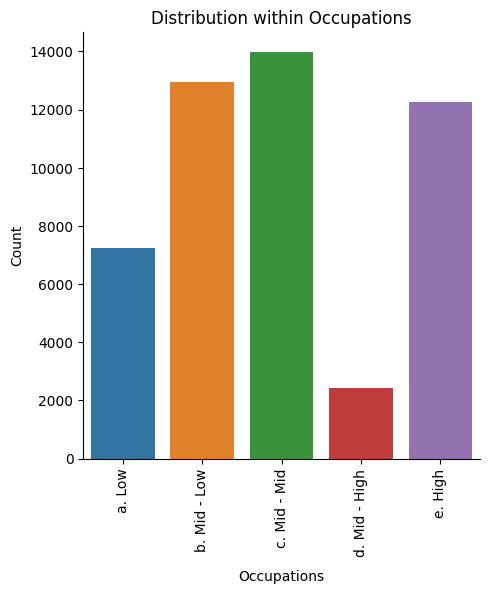

In [113]:
# Exploration of the Occupation Category
# Ordered the category in a sequential way 
# Clarity is required here. For instance, are these categories based on points in a career e.g. low career, mid career etc..

occup_order = ['a. Low', 'b. Mid - Low', 'c. Mid - Mid', 'd. Mid - High', 'e. High']

sns.catplot(x='occupation_bin', kind='count', data=df, order=occup_order)
plt.title('Distribution within Occupations')
plt.xlabel('Occupations', labelpad=10)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

# The sub-categories with the highest frequencies in order are mid-mid, mid-low, then high.

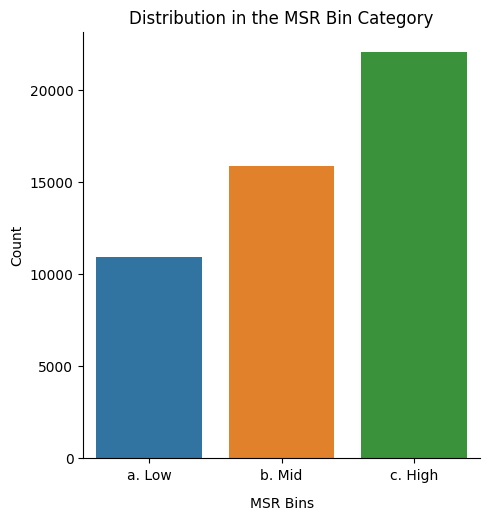

In [114]:
# Exploration of the 'msr_bin' category
# Need clarity on what this column refers to
# Highest frquency is in the High category.

msr_order = ['a. Low', 'b. Mid', 'c. High']

sns.catplot(x='msr_bin', kind='count', data=df, order=msr_order)
plt.xlabel('MSR Bins', labelpad=10)
plt.ylabel('Count')
plt.title('Distribution in the MSR Bin Category')
plt.show()

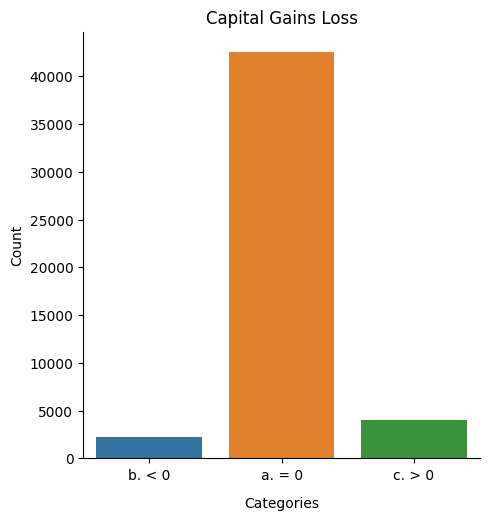

In [115]:
# Exploration of capital_gl
# Most frequent is where a. = 0
# Sub-categories not quite clear. 

capital_gl_ord = ['b. < 0', 'a. = 0', 'c. > 0']

sns.catplot(x='capital_gl_bin', kind='count', data=df, order=capital_gl_ord)
plt.title('Capital Gains Loss')
plt.xlabel('Categories', labelpad=10)
plt.ylabel('Count')
plt.show()

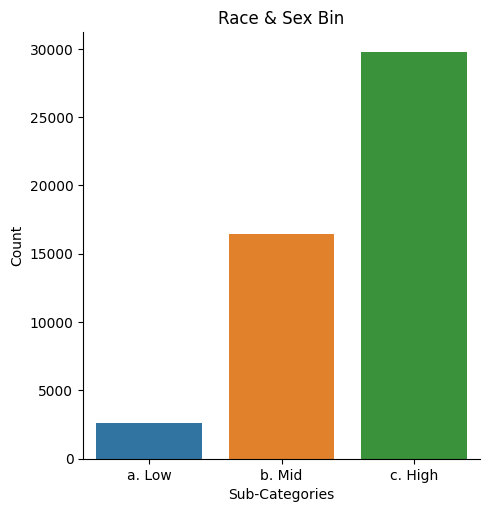

In [116]:
# Exploration of Race & Sex Data
# Categories provided are not intuitive.
# Most frequent in descending order is high, middle, and then low.


race_sex_order = ['a. Low', 'b. Mid', 'c. High']

sns.catplot(x='race_sex_bin', kind='count', data=df, order=race_sex_order)
plt.title('Race & Sex Bin')
plt.xlabel('Sub-Categories')
plt.ylabel('Count')
plt.show()

In [117]:
# Print out for easy reference to the columns.
print(df.columns, '\n')
print('Bins below are for field names from education_num_bin and onwards \n')
print(df.education_num_bin.unique(), '\n')
print(df.education_bin.unique(), '\n')
print(df.workclass_bin.unique(), '\n')
print(df.age_bin.unique(), '\n')
print(df.flag.unique(), '\n')
print(df.y.unique(), '\n')


Index(['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin', 'flag', 'y'],
      dtype='object') 

Bins below are for field names from education_num_bin and onwards 

['c. 13' 'b. 9-12' 'a. 0-8' 'd. 14' 'e. 15+'] 

['c. Bachelors' 'b. Mid' 'a. Low' 'd. Masters' 'e. High'] 

['b. income' 'a. no income'] 

['d. 36-40 & 56-60' 'e. 40-55' 'b. 26-30 & 71-100' 'c. 31-35 & 61-70'
 'a. 0-25'] 

['train' 'test'] 

[0 1] 



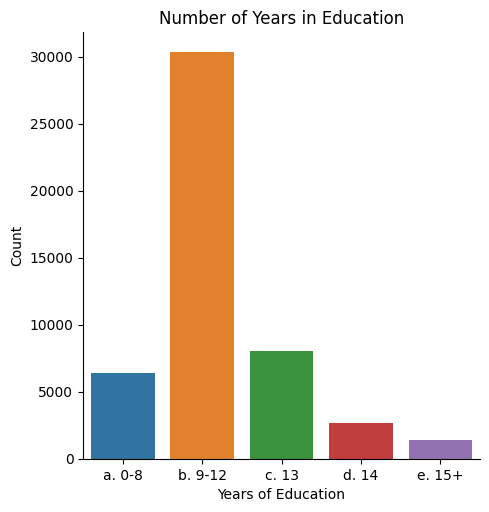

In [118]:
# Exploration of number of years in education
# Majority of people in the data set have 9-12 years of education.

years_educ_ord = ['a. 0-8', 'b. 9-12', 'c. 13', 'd. 14', 'e. 15+']

sns.catplot(x='education_num_bin', kind='count', data=df, order=years_educ_ord)
plt.title('Number of Years in Education')
plt.xlabel('Years of Education')
plt.ylabel('Count')
plt.show()

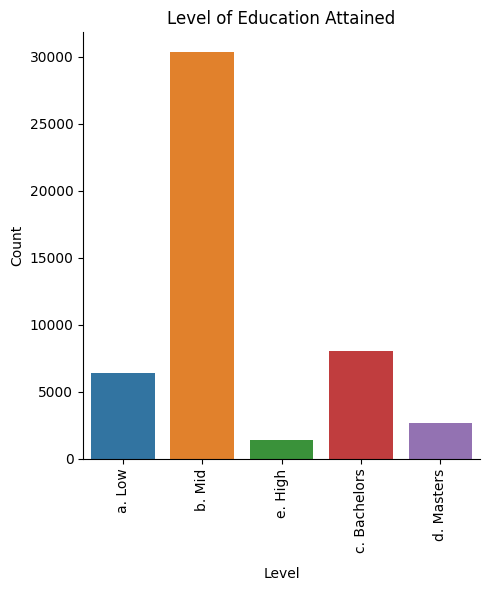

In [119]:
# Exploration of Level of Education achieved
# Majority of people are at Mid. 

educ_order = ['a. Low', 'b. Mid', 'e. High', 'c. Bachelors', 'd. Masters']

sns.catplot(x='education_bin', kind='count', data=df, order=educ_order)
plt.title('Level of Education Attained')
plt.xticks(rotation=90)
plt.xlabel('Level', labelpad=10)
plt.ylabel('Count')
plt.show()

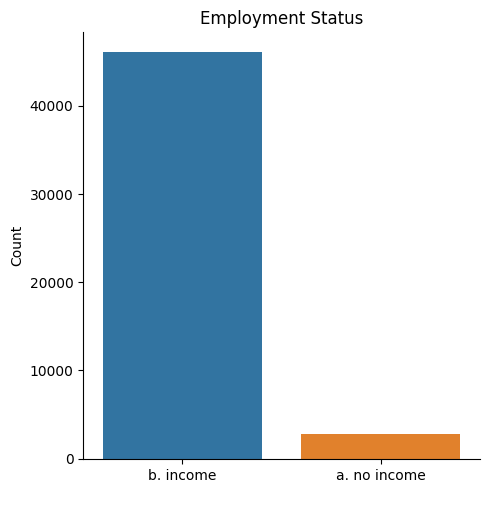

In [120]:
# Exploration of Employemnt Status.
# Majority of people in the data set have an income.

sns.catplot(x='workclass_bin', kind='count', data=df)
plt.title('Employment Status')
plt.xlabel(' ')
plt.ylabel('Count')
plt.show()

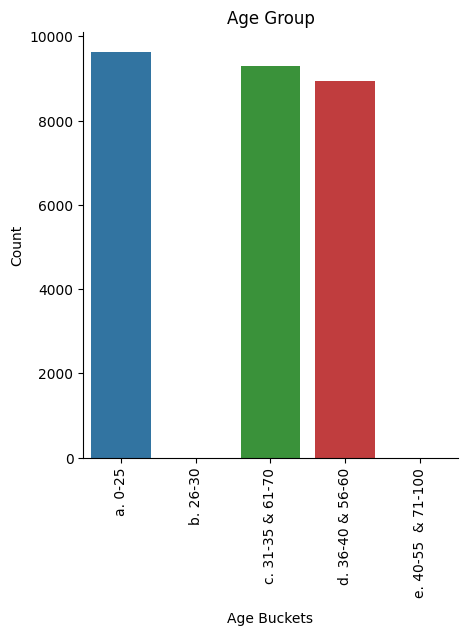

In [121]:
# Exploration of the age_bins category

# The bins are not going in sequential order of age and may create bias.


age_order = ['a. 0-25', 'b. 26-30', 'c. 31-35 & 61-70', 'd. 36-40 & 56-60', 'e. 40-55  & 71-100' ]

sns.catplot(x='age_bin', kind='count', data=df, order=age_order)
plt.title('Age Group')
plt.xticks(rotation=90)
plt.xlabel('Age Buckets', labelpad=10)
plt.ylabel('Count')
plt.show()

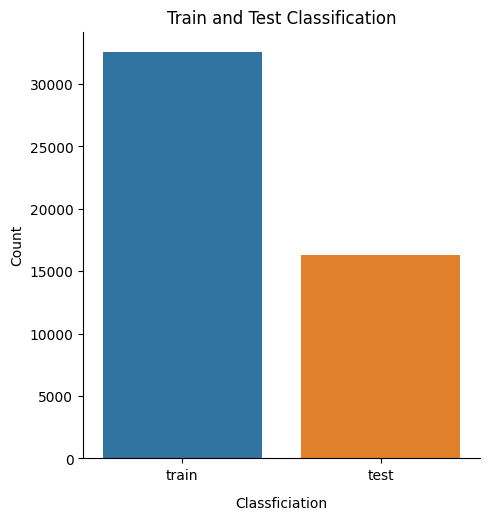

In [122]:
# Distribution of the Training and Test Data
# Just under 35,000 is for train data and about 15,000 for test data.

sns.catplot(x='flag', kind='count', data=df)
plt.title('Train and Test Classification')
plt.xlabel('Classficiation', labelpad=10)
plt.ylabel('Count')
plt.show()

## Section 1: Discretization (or binning)

### Advantages of Discretization

The advantages of discretization are;

1.	Improved interpretability: Decision tree algorithms are often used for classification or regression tasks where the goal is to predict an outcome based on a set of input features. By discretizing the continuous input features into categories, decision trees can be more easily interpreted and understood by humans. This can help to identify meaningful patterns in the data and make better decisions.

2.	Reduced overfitting: Decision trees can easily overfit the training data if the features are continuous and not discretized. Discretization can help to reduce overfitting by converting continuous features into categorical features that are less prone to overfitting. This can lead to a more generalized decision tree that performs better on new, unseen data.

3.	Improved performance: Discretization can improve decision tree performance by reducing the tree's complexity. This is because categorical features are less complex than continuous features and therefore require fewer computational resources to split the nodes and construct the tree.

4.	Reduced sensitivity to outliers: Discretization can help reduce outliers’ impact on decision trees. This is because outliers significantly impact the split of continuous features but have less of an effect on the partition of categorical features.

Discretization can be a valuable technique for improving decision tree algorithms' performance, interpretability, and robustness. However, it is crucial to carefully choose the method of discretization and the number of categories to ensure that the information in the data is preserved and the algorithm is not over or underfitting the data.

### Disadvantages of Discretization

If we do not bin the numerous continuous variables in the census data set, we will encounter some of the issues listed below.

1. Overfitting: Decision tree algorithms can easily overfit the training data if the continuous variables are not discretized. This is because decision trees are sensitive to small variations in the data, and continuous variables can have many possible splits, which can lead to a highly complex tree that is overfitted to the training data. Discretization can help to reduce the complexity of the tree and prevent overfitting.

2. Loss of information: Discretization can lead to the loss of information in the continuous variables. This is because the process of discretization involves grouping similar values into categories, which can lead to the loss of precision and detail in the data.

3. Choice of method: The choice of method used to discretize the continuous variables can have a significant impact on the performance of the decision tree algorithm. For example, using a method such as equal width binning may result in categories that do not capture the underlying patterns in the data, while using a more complex method such as decision tree-based discretization may result in categories that are too specific and lead to overfitting.

4. Computational complexity: Discretization can increase the computational complexity of the decision tree algorithm, as it involves an additional step of preprocessing the data to transform continuous variables into categorical variables. This can make the training and prediction process slower and more resource-intensive.

In summary, not discretizing the continuous variables in the dataset can lead to overfitting, loss of information, and increased computational complexity. However, it is important to choose an appropriate method of discretization that balances the trade-off between the loss of information and the prevention of overfitting.

In [123]:
print(df['hours_per_week_bin'].describe())

print(list(df.columns))

count        48842
unique           5
top       b. 31-40
freq         26639
Name: hours_per_week_bin, dtype: object
['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin', 'age_bin', 'flag', 'y']


In [124]:
# Print-out of a list of the unique categories in each column. 
print(df.columns, '\n')

print(df.hours_per_week_bin.unique(), '\n')
print(df.occupation_bin.unique(), '\n')
print(df.msr_bin.unique(), '\n')
print(df.capital_gl_bin.unique(), '\n')
print(df.race_sex_bin.unique(), '\n')
print(df.education_num_bin.unique(), '\n')
print(df.education_bin.unique(), '\n')
print(df.workclass_bin.unique(), '\n')
print(df.age_bin.unique(), '\n')
print(df.flag.unique(), '\n')
print(df.y.unique(), '\n')

Index(['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin', 'flag', 'y'],
      dtype='object') 

['b. 31-40' 'a. 0-30' 'd. 41-50 & 61-70' 'c. 71-100' 'e. 51-60'] 

['b. Mid - Low' 'e. High' 'a. Low' 'c. Mid - Mid' 'd. Mid - High'] 

['b. Mid' 'c. High' 'a. Low'] 

['c. > 0' 'a. = 0' 'b. < 0'] 

['c. High' 'b. Mid' 'a. Low'] 

['c. 13' 'b. 9-12' 'a. 0-8' 'd. 14' 'e. 15+'] 

['c. Bachelors' 'b. Mid' 'a. Low' 'd. Masters' 'e. High'] 

['b. income' 'a. no income'] 

['d. 36-40 & 56-60' 'e. 40-55' 'b. 26-30 & 71-100' 'c. 31-35 & 61-70'
 'a. 0-25'] 

['train' 'test'] 

[0 1] 



In [125]:
# Create  a function to extract the summary statistics for all columns in the census data.
# The results of the function will be input into the Data Quality Report

columns = ['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin', 'age_bin', 'flag', 'y']

def describe_columns(df, columns):
    for col in columns:
        print(df[col].describe())
        print('\n''.........................................')

describe_columns(df, columns)

count        48842
unique           5
top       b. 31-40
freq         26639
Name: hours_per_week_bin, dtype: object

.........................................
count            48842
unique               5
top       c. Mid - Mid
freq             13971
Name: occupation_bin, dtype: object

.........................................
count       48842
unique          3
top       c. High
freq        22047
Name: msr_bin, dtype: object

.........................................
count      48842
unique         3
top       a. = 0
freq       42525
Name: capital_gl_bin, dtype: object

.........................................
count       48842
unique          3
top       c. High
freq        29737
Name: race_sex_bin, dtype: object

.........................................
count       48842
unique          5
top       b. 9-12
freq        30324
Name: education_num_bin, dtype: object

.........................................
count      48842
unique         5
top       b. Mid
freq       30324
Name: ed

### Summary of findings after Explorative Data Analysis

| Feature1 Header     | Feature Mode    | Feature Freq    |
| ---------------     | --------------- | --------------- |
| hours_per_week_bin  | b. 31-40        | 26639           |
| occupation_bin      | c. Mid - Mid    | 13971           |
| msr_bin             | c. High         | 22047           |

* Race_Sex data is not clear. 
* Exploration of the Occupation Category
* Ordered the category in a sequential way 
* Clarity is required here. For instance, are these categories based on points in a career e.g. low career, mid career etc..
* Firstly, I re-arranged the order so the ages increase from left to right. However, the 41-50 & 61-70 
* were grouped together. This is not intuitive and could misrepresent the findings if there is no relationship
* between these groups.
* All columns are Dtype 'Object' with exception to 'y', which has int64 values.
* Consider dropping the income column since most of the observations have an income. Unless we delve further into those without income.

**_NB To complete the table before submission. Confirm with Dr. Brahma first if I have done too much._**

## Section 3: Build Decision Tree Classifier Models

Now we use the Decision Tree. Comment later.

#### Question on Decision Tree Classifier in error noted below
Got an error when trying to fit the decision tree onto the training data. The error indicates "_ValueError: could not convert string to float: 'b. 31-40'_" indicating a numerical value might be prefered. 

  * Are we supposed to use the 'Label_Encoder' class from scikit learn?
  * Was the column '_hours_per_week_bin_' not already converted into categories by binning?
  * Is it the letters '_b_' that is throwing of the model?
  
Should I use label Encoder from scikit learn, or my code is wrong?

### Data Preprocessing

It appears some of the categorical columns require Encoding or Transforming because they are causing problems in the Decision Tree Classifier.



In [126]:
from sklearn.preprocessing import LabelEncoder

#['education_bin', 'occupation_bin', 'workclass_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin']

# Encode the 'age_bin' category 
le = LabelEncoder()
df['age_bin_encoded'] = le.fit_transform(df['age_bin'])

In [127]:
# Testing one Category first.

df = df.drop(columns=['age_bin'])
print(df.head())

  hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0           b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1            a. 0-30        e. High  c. High         a. = 0      c. High   
2           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4           b. 31-40        e. High  c. High         a. = 0       a. Low   

  education_num_bin education_bin workclass_bin   flag  y  age_bin_encoded  
0             c. 13  c. Bachelors     b. income  train  0                3  
1             c. 13  c. Bachelors     b. income  train  0                4  
2           b. 9-12        b. Mid     b. income  train  0                3  
3            a. 0-8        a. Low     b. income  train  0                4  
4             c. 13  c. Bachelors     b. income  train  0                1  


In [128]:
# Encoding categorical variables.

df['education_num_bin_encoded'] = le.fit_transform(df['education_num_bin'])
df['education_bin_encoded'] = le.fit_transform(df['education_bin'])
df['occupation_bin_encoded'] = le.fit_transform(df['occupation_bin'])
df['workclass_bin_encoded'] = le.fit_transform(df['workclass_bin'])
df['msr_bin_encoded'] = le.fit_transform(df['msr_bin'])
df['capital_gl_bin_encoded'] = le.fit_transform(df['capital_gl_bin'])
df['race_sex_bin_encoded'] = le.fit_transform(df['race_sex_bin'])
df['flag_encoded'] = le.fit_transform(df['flag'])

In [129]:
# Drop the columns that have been encoded. Aim is to stop the Decision Tree Classifier from continuously picking age_bin
# and any other categories that have been encoded.

#['education_bin', 'occupation_bin', 'workclass_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin']

df = df.drop(columns=['education_num_bin','education_bin', 'occupation_bin', 'workclass_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin','hours_per_week_bin','flag'])
print(df.head())
print()


   y  age_bin_encoded  education_num_bin_encoded  education_bin_encoded  \
0  0                3                          2                      2   
1  0                4                          2                      2   
2  0                3                          1                      1   
3  0                4                          0                      0   
4  0                1                          2                      2   

   occupation_bin_encoded  workclass_bin_encoded  msr_bin_encoded  \
0                       1                      1                1   
1                       4                      1                2   
2                       0                      1                1   
3                       0                      1                2   
4                       4                      1                2   

   capital_gl_bin_encoded  race_sex_bin_encoded  flag_encoded  
0                       2                     2             1  
1     

# Section 3: Build Decision Tree Classifier

This is the default decision tree before we start tuning the hyper parameters.

In [130]:
# Import train and test module
import pandas as pd
from sklearn.model_selection import train_test_split

In [131]:
# I have blanked this section out because I keep getting problems with the categorical data, including the flag column
# which, as a last step have used label encoder on. See the next cell for amended code.


#print(df.head(), '\n')

# Split the data into training and test sets based on the values in the flag column
#train_data = df.loc[df['flag'] == 'train'].drop('y', axis=1)
#train_labels = df.loc[df['flag'] == 'train', 'y']
#test_data = df.loc[df['flag'] == 'test'].drop('y', axis=1)
#test_labels = df.loc[df['flag'] == 'test', 'y']

In [132]:
print(df.head(), '\n')

# Split the data into training and test sets based on the values in the flag column
train_data = df.loc[df['flag_encoded'] == 1].drop('y', axis=1)
train_labels = df.loc[df['flag_encoded'] == 1, 'y']
test_data = df.loc[df['flag_encoded'] == 0].drop('y', axis=1)
test_labels = df.loc[df['flag_encoded'] == 0, 'y']

   y  age_bin_encoded  education_num_bin_encoded  education_bin_encoded  \
0  0                3                          2                      2   
1  0                4                          2                      2   
2  0                3                          1                      1   
3  0                4                          0                      0   
4  0                1                          2                      2   

   occupation_bin_encoded  workclass_bin_encoded  msr_bin_encoded  \
0                       1                      1                1   
1                       4                      1                2   
2                       0                      1                1   
3                       0                      1                2   
4                       4                      1                2   

   capital_gl_bin_encoded  race_sex_bin_encoded  flag_encoded  
0                       2                     2             1  
1     

In [133]:
# Fit a decision tree model on the training data
from sklearn.tree import DecisionTreeClassifier
t = DecisionTreeClassifier(max_depth=10, random_state=101, max_features=None, min_samples_leaf=15)
t.fit(train_data, train_labels)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=15, random_state=101)

In [134]:
# Use the model to predict the test data.

print("Testing the model on the test_data to determine accuracy using sklearn's accuracy score '\n'")
y_predict = t.predict(test_data)


Testing the model on the test_data to determine accuracy using sklearn's accuracy score '
'


In [135]:
# Evaluate the accuracy, precision, recall, and F1 score of the model.
# All relevant packages for these processes have been imported and installed in the first cell.

precision_list = []
recall_list = []
f1_list = []

from sklearn.metrics import accuracy_score, classification_report

# Compute the accuracy, precision, recall, and F1 score
acc = accuracy_score(test_labels, y_predict)
report = classification_report(test_labels, y_predict)

# Precision Score
precision = precision_score(test_labels, y_predict)
recall = recall_score(test_labels, y_predict)
f1 = f1_score(test_labels, y_predict)


# Print the results
print('Accuracy: ', acc)
print('Classification Report: \n', report)


Accuracy:  0.8422087095387262
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.71      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.76     16281
weighted avg       0.83      0.84      0.84     16281



### Accuracy and Classification Report

* The f1 score for 0 is higher than for 1
* Precision and Recall are higher for 0 than they are for 1
* Accuracy is reflected as 84%

#### Classification Report

Accuracy:  0.8422087095387262
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.71      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.76     16281
weighted avg       0.83      0.84      0.84     16281


In [136]:
# CALCULATE CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(test_labels, y_predict)

# Print the confusion matrix
print(cm)


[[11526   909]
 [ 1660  2186]]


# Section 4 & 5: Decision Tree Performance & Evaluation

## Run 1: Split Criteria: " Entropy" vs "Gini Impurity

First Run is based on Entropy, the second run on Gini Impurity. Based on the results, there is no difference between using the 'entropy' or 'gini' criterion. 

**Recommend using criterion "entropy"  since both have similar results.**

In [137]:
# Fit a decision tree model on the training data

criterion_list = ['entropy','gini']

for criterion in criterion_list:
    # Fit a decision tree model on the training data with the current criterion value
    t1 = DecisionTreeClassifier(criterion=criterion, random_state=101)
    t1.fit(train_data, train_labels)
    
    # Predict the test data
    y1_predict = t1.predict(test_data)
    
    # Calculate Accuracy, Performance Metrics,and Confusion Matrix
    acc1 = accuracy_score(test_labels, y1_predict)
    report1 = classification_report(test_labels, y1_predict)
    cm1 = confusion_matrix(test_labels, y1_predict)
    
    # Print the results
    print(f"Decision Tree Classifier using {criterion} criterion \n")
    print(f"Accuracy: {acc1:.4f} \n")
    print(f"Classification report: \n{report1}\n")
    print(f"Confusion Matrix: \n{cm1}\n")
    print()

Decision Tree Classifier using entropy criterion 

Accuracy: 0.8387 

Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.70      0.56      0.62      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.74      0.76     16281
weighted avg       0.83      0.84      0.83     16281


Confusion Matrix: 
[[11505   930]
 [ 1696  2150]]


Decision Tree Classifier using gini criterion 

Accuracy: 0.8388 

Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     12435
           1       0.70      0.56      0.62      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.74      0.76     16281
weighted avg       0.83      0.84      0.83     16281


Confusion Matrix: 
[[11500   935]
 [ 1689  2157]]




## Run 2: Minimum Sample Leaf

We shall evaluate performance metrics based on changing the parameters for _min_samples_leaf_ using the list below;

min_sam_leaf_list = list(range(5, 41, 5))

The parameter of 10 produces the highest accuracy and has a comparable precision (0.87) and recall (0.93) to the other parameters. Parameter 35 has the highest precision at 0.88.

**Recommended to use parameter 40 for Run 3.**

In [138]:
min_sam_leaf_list = list(range(5, 41, 5))

# List for storing performance metrics for the Data Table
accuracy_list = []
recall_list = []
precision_list = []
f1_score_list = []

for leaf in min_sam_leaf_list:
    # Fit a decision tree model on the training data with the current criterion value
    t2 = DecisionTreeClassifier(criterion='entropy', random_state=101, min_samples_leaf=leaf)
    t2.fit(train_data, train_labels)
    
    # Predict the test data
    y2_predict = t2.predict(test_data)
    
    # Calculate Accuracy, Performance Metrics,and Confusion Matrix
    acc2 = accuracy_score(test_labels, y2_predict)
    accuracy_list.append(acc2.round(5))
    
    precision2 = precision_score(test_labels, y2_predict)
    precision_list.append(precision2.round(5))
    
    recall2 = recall_score(test_labels, y2_predict)
    recall_list.append(recall2)
    
    f12 = f1_score(test_labels, y2_predict, average='binary')
    f1_score_list.append(f12)
    
    #report2 = classification_report(test_labels, y2_predict)
    #cm2 = confusion_matrix(test_labels, y2_predict)
      
    # Print the results
    print(f"Decision Tree Classifier using min_sample_leaf parameter of {leaf} \n")
    print(f"Accuracy: {acc2:.4f} \n")
    #print(f"Classification report: \n{report2}\n")
    #print(f"Confusion Matrix: \n{cm2}\n")
    print()
    

    
min_samples_leaf_table = pd.DataFrame({"min_samples_leaf": min_sam_leaf_list, "Accuracy": accuracy_list,
                                "Recall": recall_list, "Precision": precision_list,
                                "F1 Score": f1_score_list})


print("min_sample_lead: ", min_sam_leaf_list)
print("Accuracy: ", accuracy_list)
print("Recall: ", recall_list)
print("Precision: ", precision_list)
print("f1_score: ", f1_score_list)
print()
print(min_samples_leaf_table)

Decision Tree Classifier using min_sample_leaf parameter of 5 

Accuracy: 0.8417 


Decision Tree Classifier using min_sample_leaf parameter of 10 

Accuracy: 0.8424 


Decision Tree Classifier using min_sample_leaf parameter of 15 

Accuracy: 0.8417 


Decision Tree Classifier using min_sample_leaf parameter of 20 

Accuracy: 0.8417 


Decision Tree Classifier using min_sample_leaf parameter of 25 

Accuracy: 0.8416 


Decision Tree Classifier using min_sample_leaf parameter of 30 

Accuracy: 0.8422 


Decision Tree Classifier using min_sample_leaf parameter of 35 

Accuracy: 0.8426 


Decision Tree Classifier using min_sample_leaf parameter of 40 

Accuracy: 0.8428 


min_sample_lead:  [5, 10, 15, 20, 25, 30, 35, 40]
Accuracy:  [0.84172, 0.84239, 0.84172, 0.84172, 0.84159, 0.84221, 0.84258, 0.84282]
Recall:  [0.5686427457098284, 0.5712428497139885, 0.5717628705148206, 0.5707228289131565, 0.5717628705148206, 0.5686427457098284, 0.5772230889235569, 0.5832033281331254]
Precision:  [0.70

## Run 3: Maximum Feature

We shall evaluate performance metrics based on changing the parameters for min_samples_leaf using the list below;

max_features_list = list("auto", "none", range(0.3, 0.9, 0.1))

**Recommend using the paramter 0.8 for the maximum feature. It has the highest accuracy of 0.84301. Additionally, it has the highest recall and f1 score. See the table below.**


In [139]:
max_features_list = ["auto", None, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

# Lists for storing performance metrics in a Data Frame table.
accuracy_list = []
recall_list = []
precision_list = []
f1_score_list = []

for feature in max_features_list:
    # Fit a decision tree model on the training data with the current criterion value
    t3 = DecisionTreeClassifier(criterion='entropy', random_state=101, max_features=feature, min_samples_leaf=40)
    t3.fit(train_data, train_labels)
    
    # Predict the test data
    y3_predict = t3.predict(test_data)
    
    # Calculate Accuracy, Performance Metrics,and Confusion Matrix
    acc3 = accuracy_score(test_labels, y3_predict)
    accuracy_list.append(acc3.round(5))
    
    precision3 = precision_score(test_labels, y3_predict)
    precision_list.append(precision3.round(5))
    
    recall3 = recall_score(test_labels, y3_predict)
    recall_list.append(recall3)
    
    f13 = f1_score(test_labels, y3_predict, average='binary')
    f1_score_list.append(f13)
    
    #report3 = classification_report(test_labels, y3_predict)
    #cm3 = confusion_matrix(test_labels, y3_predict)
    
    # Print the results
    print(f"Decision Tree Classifier using max_features parameter of {feature} \n")
    print(f"Accuracy: {acc3:.4f} \n")
    #print(f"Classification report: \n{report3}\n")
    #print(f"Confusion Matrix: \n{cm3}\n")
    #print("min_sample_lead: ", min_sam_leaf_list)
    
    
max_features_list_table = pd.DataFrame({"max_features": max_features_list, "Accuracy": accuracy_list,
                                "Recall": recall_list, "Precision": precision_list,
                                "F1 Score": f1_score_list})

# The #prints below were test data for trouble shooting. I did not delete them so they serve as a reminder.
#print("Accuracy: ", accuracy_list)
#print("Recall: ", recall_list)
#print("Precision: ", precision_list)
#print("f1_score: ", f1_score_list)
print()
#print(max_features_list)
print()
print(max_features_list_table)

Decision Tree Classifier using max_features parameter of auto 

Accuracy: 0.8387 

Decision Tree Classifier using max_features parameter of None 

Accuracy: 0.8428 

Decision Tree Classifier using max_features parameter of 0.3 

Accuracy: 0.8407 

Decision Tree Classifier using max_features parameter of 0.4 

Accuracy: 0.8387 

Decision Tree Classifier using max_features parameter of 0.5 

Accuracy: 0.8415 

Decision Tree Classifier using max_features parameter of 0.6 

Accuracy: 0.8422 

Decision Tree Classifier using max_features parameter of 0.7 

Accuracy: 0.8417 

Decision Tree Classifier using max_features parameter of 0.8 

Accuracy: 0.8430 



  max_features  Accuracy    Recall  Precision  F1 Score
0         auto   0.83871  0.554602    0.70026  0.618979
1         None   0.84282  0.583203    0.70116  0.636764
2          0.3   0.84067  0.552782    0.70867  0.621093
3          0.4   0.83871  0.554602    0.70026  0.618979
4          0.5   0.84147  0.570983    0.70227  0.629858
5   

## Run 4: Maximum Depth

In this run, the focus will be on the maximum depth. We shall test out the depths ranging from 2 to 16.

**Recommend using results based on a maximum depth of 8 because it has the highest accuracy of 0.84276 while producing the second highest f1 score. Refer to the table in the output below**


In [140]:
max_depth_list = list(range(2, 18, 2))

# Lists for storing performance metrics in a Data Frame table.
accuracy_list = []
recall_list = []
precision_list = []
f1_score_list = []

for depth in max_depth_list:
    # Fit a decision tree model on the training data with the current criterion value
    t4 = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=101, max_features=None, min_samples_leaf=10)
    t4.fit(train_data, train_labels)
    
    # Predict the test data
    y4_predict = t4.predict(test_data)
    
    # Calculate Accuracy, Performance Metrics,and Confusion Matrix
    acc4 = accuracy_score(test_labels, y4_predict)
    accuracy_list.append(acc4.round(5))
    
    precision4 = precision_score(test_labels, y4_predict)
    precision_list.append(precision4.round(5))
    
    recall4 = recall_score(test_labels, y4_predict)
    recall_list.append(recall4.round(5))
    
    f14 = f1_score(test_labels, y4_predict, average='binary')
    f1_score_list.append(f14.round(5))
    
    #report4 = classification_report(test_labels, y4_predict)
    #cm4 = confusion_matrix(test_labels, y4_predict)
    
    # Print the results
    print(f"Decision Tree Classifier using maximum depth of {depth} \n")
    print(f"Accuracy: {acc4:.4f} \n")
    #print(f"Classification report: \n{report4}\n")
    #print(f"Confusion Matrix: \n{cm4}\n")
    print()
    
max_depth_list_table = pd.DataFrame({"max_depth": max_depth_list, "Accuracy": accuracy_list,
                                "Recall": recall_list, "Precision": precision_list,
                                "F1 Score": f1_score_list})

print(max_depth_list_table)
    

Decision Tree Classifier using maximum depth of 2 

Accuracy: 0.8218 


Decision Tree Classifier using maximum depth of 4 

Accuracy: 0.8350 


Decision Tree Classifier using maximum depth of 6 

Accuracy: 0.8422 


Decision Tree Classifier using maximum depth of 8 

Accuracy: 0.8428 


Decision Tree Classifier using maximum depth of 10 

Accuracy: 0.8425 


Decision Tree Classifier using maximum depth of 12 

Accuracy: 0.8419 


Decision Tree Classifier using maximum depth of 14 

Accuracy: 0.8419 


Decision Tree Classifier using maximum depth of 16 

Accuracy: 0.8424 


   max_depth  Accuracy   Recall  Precision  F1 Score
0          2   0.82176  0.40692    0.71592   0.51890
1          4   0.83496  0.51118    0.70898   0.59405
2          6   0.84221  0.56656    0.70724   0.62913
3          8   0.84276  0.56682    0.70917   0.63006
4         10   0.84252  0.56370    0.70989   0.62841
5         12   0.84190  0.56968    0.70450   0.62996
6         14   0.84190  0.56968    0.70450   0.62

# Section 6: Best Decision Tree 

This tree is created with inputs from the best parameters of the four runs undertaken under section 4 & 5. However, after inputting the recommended parameters for my best decision tree I received a warning message indicating "_Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior_". 

I have left the parameters as they are as the instrcutions stated I use the best hyper parameter inputs. It is notable that the accuracy and other performance metrics drop significantly. Possible issues with the parameters.


In [141]:
# Running a model based on the best hyperparameters metrics determined in each of the prior four runs. 

# Fit a decision tree model on the training data
from sklearn.tree import DecisionTreeClassifier
t5 = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=101, max_features=0.8, min_samples_leaf=40)
t5.fit(train_data, train_labels)

# Use the model to predict the test data.

print("Testing the model on the test_data to determine accuracy using sklearn's accuracy score \n")
y5_predict = t5.predict(test_data)

# Evaluate the accuracy, precision, recall, and F1 score of the model.
# All relevant packages for these processes have been imported and installed in the first cell.

from sklearn.metrics import accuracy_score, classification_report

# Compute the accuracy, precision, recall, and F1 score
acc5 = accuracy_score(test_labels, y5_predict)
report5 = classification_report(test_labels, y5_predict)

# Print the results
print('Accuracy: ', acc5)
print('Classification Report: \n', report5)

Testing the model on the test_data to determine accuracy using sklearn's accuracy score 

Accuracy:  0.8419630243842516
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.71      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.76     16281
weighted avg       0.83      0.84      0.84     16281



# Section 6 Visualize the Decision Tree

We can see from the Decision Tree that the Root node starts at msr_bin_encoded. The size of the tree is a result of the parameters that allow more leafs to grow. 

In [142]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# check for the sklearn version
import sklearn
print(sklearn.__version__)

1.0.2


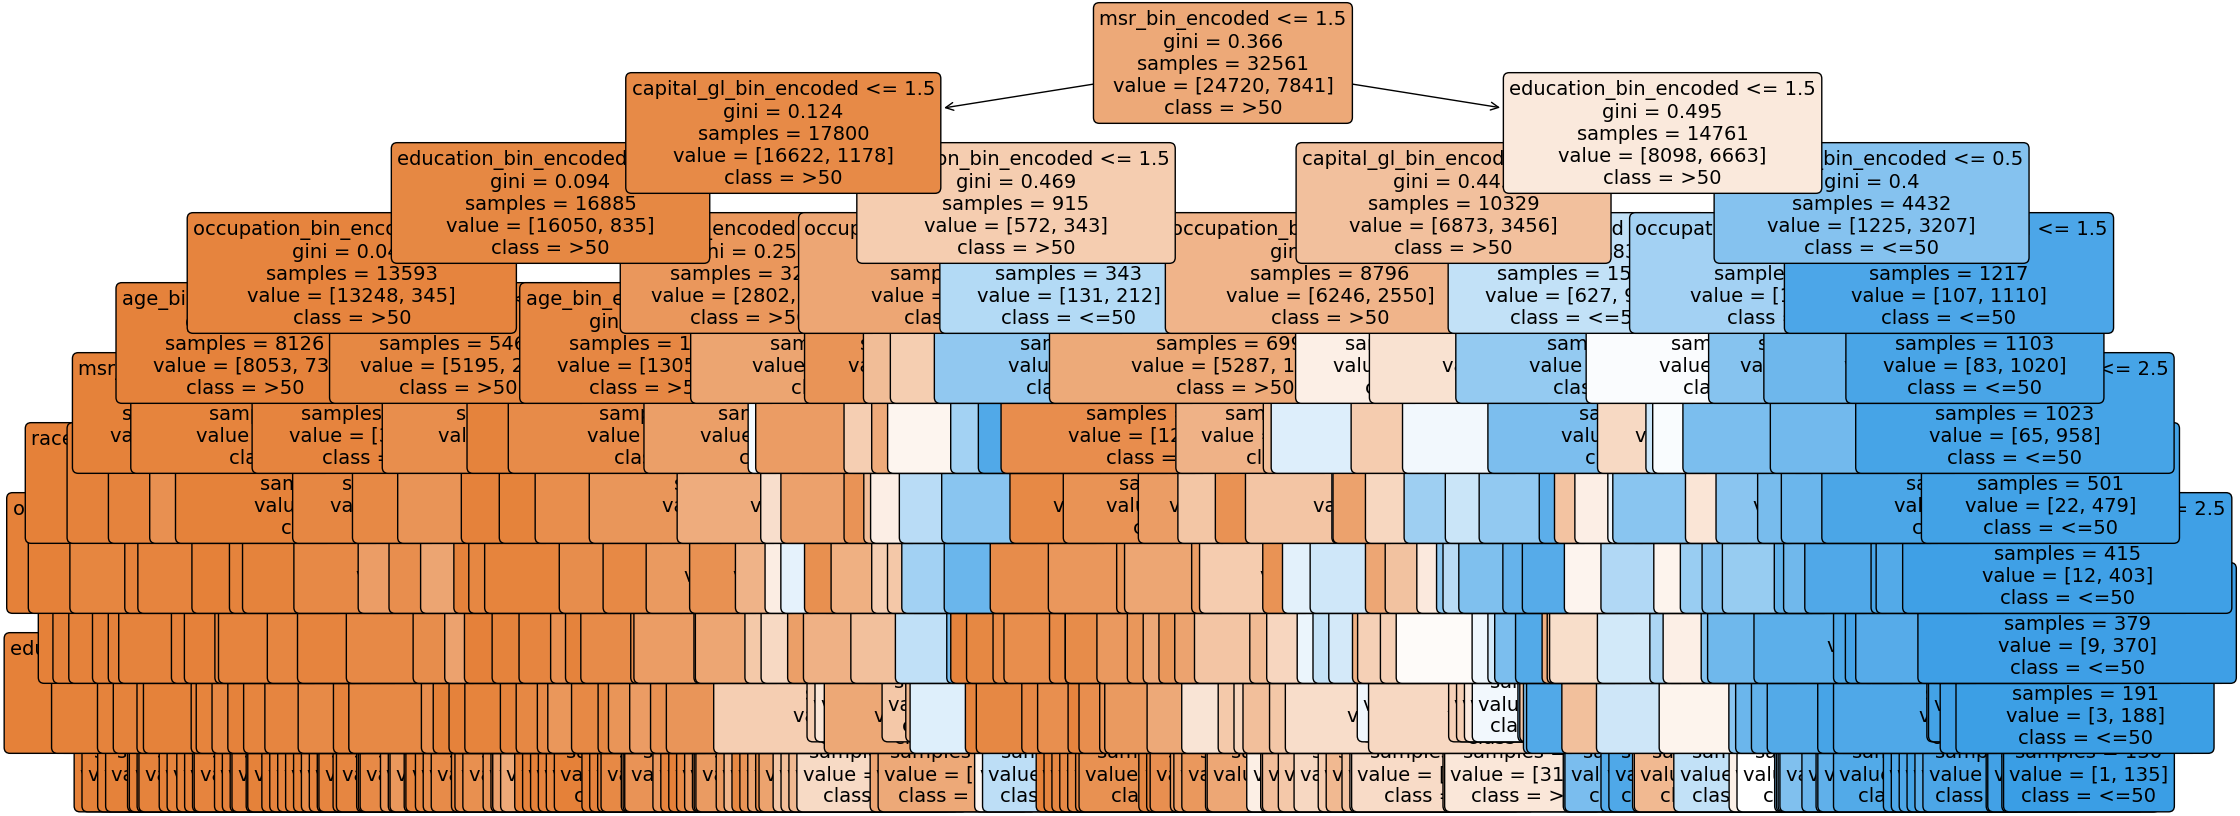

In [143]:
plt.figure(figsize=(25,10))
a = plot_tree(t, feature_names=list(train_data), class_names=[">50", '<=50'], 
              filled=True, rounded=True, fontsize=14)

# Section 7: Conclusion

## Summary of findings of the Best Decision Tree

Based on the output, the accuracy of the decision tree model is 0.84196, which means that the model correctly predicted the income level of approximately 84% of the test set. The classification report shows that the model has a high precision (0.87) for predicting the '0' class (income level <=50K), which means that the model correctly identified a high percentage of individuals with income level <=50K out of all individuals predicted to have that income level. However, the precision for the '1' class (income level >50K) is lower at 0.71, indicating that the model did not correctly identify as many individuals with income level >50K.

The recall for the '0' class is high at 0.93, which means that the model correctly identified a high percentage of individuals with income level <=50K out of all individuals who actually had that income level. However, the recall for the '1' class is lower at 0.57, indicating that the model did not correctly identify as many individuals with income level >50K out of all individuals who actually had that income level.

The F1-score for the '0' class is high at 0.90, indicating that the model has a good balance between precision and recall for predicting the '0' class. This indicates a high level of precision and recall, suggesting that the model is performing well in both minimizing false positives and false negatives. Furthermore, it implies that the model has a high level of accuracy in identifying positive instances while also minimizing the number of false positives and negatives. However, the F1-score for the '1' class is lower at 0.63, indicating that the model did not have a good balance between precision and recall for predicting the '1' class.

## Insights from the Decision Tree

The _msr_bin_encoded_ was used as the root note. From it _capital_gl_ and _education_ were chosen as the next nodes. The Gini impurity indicates that both nodes are impure reflected in 0.124 and 0.495 for the first two nodes that branch off: the capital_gl and education_bn nodes. 

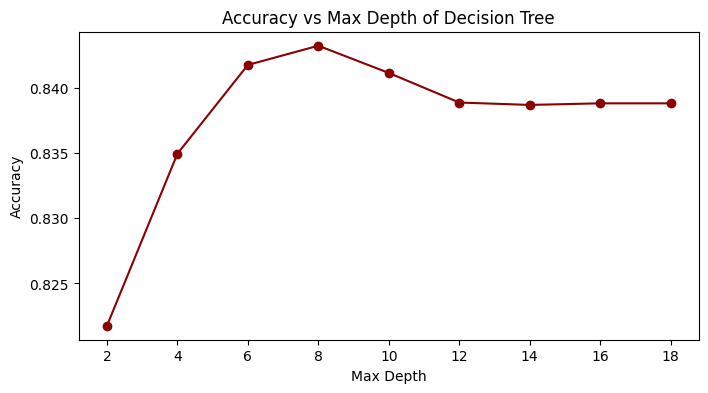

In [144]:
# testing Dr. Brahma code
results = []
max_depth_options = np.arange(2,20,2)
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth=trees, random_state=101)
    model.fit(train_data, train_labels)
    y_pred = model.predict(test_data)
    accuracy = np.mean(test_labels==y_pred)
    results.append(accuracy)
    
plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color='darkred', marker='o' )
plt.title('Accuracy vs Max Depth of Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()
    

#t4.fit(train_data, train_labels)
    
# Predict the test data
#y4_predict = t4.predict(test_data)
    

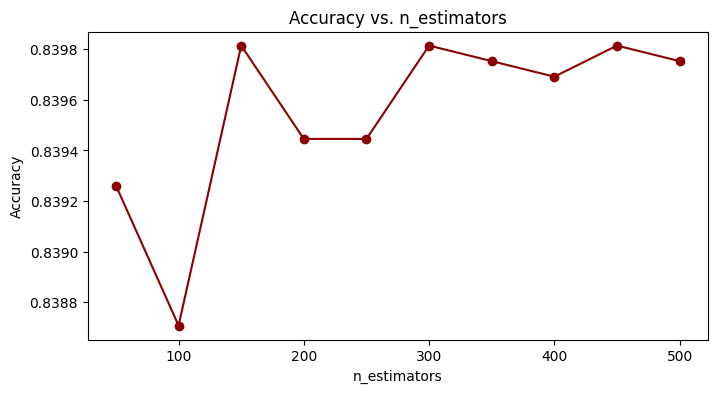

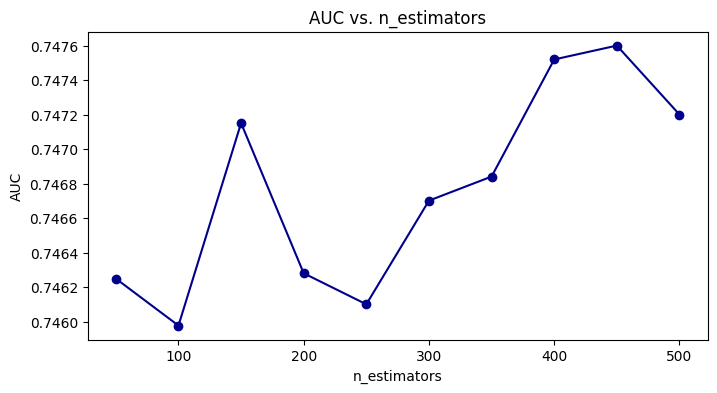

In [145]:
# Initialize empty lists to store accuracy and AUC results for Random Tree Classifier
accuracy_results_RanTree = []
auc_results_RanTree = []

# Define the values of n_estimators to test
n_estimator_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Train a Random Forest classifier for each value of n_estimators
for n_estimators in n_estimator_options:
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=101)
    model.fit(train_data, train_labels.values.ravel())

    # Predict labels for the test data and calculate accuracy and AUC scores
    y_pred = model.predict(test_data)
    accuracy = accuracy_score(test_labels, y_pred)
    auc = roc_auc_score(test_labels, y_pred)

    # Append the accuracy and AUC scores to the results lists
    accuracy_results_RanTree.append(accuracy)
    auc_results_RanTree.append(auc)

# Plot the accuracy vs. n_estimators curve
plt.figure(figsize=(8,4))
plt.plot(n_estimator_options, accuracy_results_RanTree, color='darkred', marker='o')
plt.title('Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

# Plot the AUC vs. n_estimators curve
plt.figure(figsize=(8,4))
plt.plot(n_estimator_options, auc_results_RanTree, color='darkblue', marker='o')
plt.title('AUC vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()

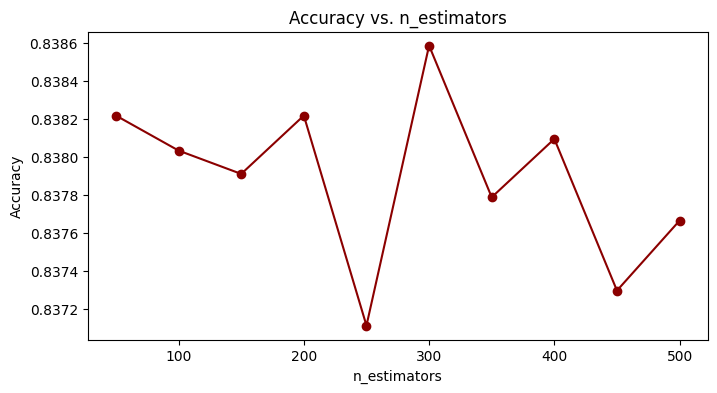

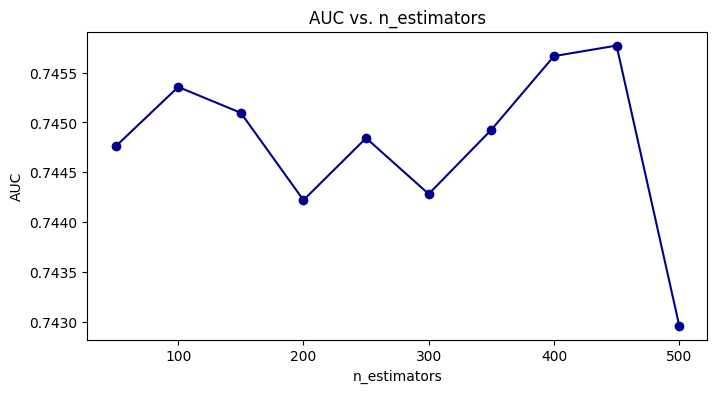

In [146]:
# AdaBoostClassifier is the model being assessed.

from sklearn.ensemble import AdaBoostClassifier

# Initialize empty lists to store accuracy and AUC results
accuracy_results_AdaBoost = []
auc_results_AdaBoost = []

# Define the values of n_estimators to test
n_estimator_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Train an AdaBoost classifier for each value of n_estimators
for n_estimators in n_estimator_options:
    base_model = DecisionTreeClassifier(max_depth=None, random_state=101)
    model = AdaBoostClassifier(base_estimator=base_model, n_estimators=n_estimators, random_state=101)
    model.fit(train_data, train_labels.values.ravel())

    # Predict labels for the test data and calculate accuracy and AUC scores
    y_pred = model.predict(test_data)
    accuracy = accuracy_score(test_labels, y_pred)
    auc = roc_auc_score(test_labels, y_pred)

    # Append the accuracy and AUC scores to the results lists
    accuracy_results_AdaBoost.append(accuracy)
    auc_results_AdaBoost.append(auc)

# Plot the accuracy vs. n_estimators curve
plt.figure(figsize=(8,4))
plt.plot(n_estimator_options, accuracy_results_AdaBoost, color='darkred', marker='o')
plt.title('Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

# Plot the AUC vs. n_estimators curve
plt.figure(figsize=(8,4))
plt.plot(n_estimator_options, auc_results_AdaBoost, color='darkblue', marker='o')
plt.title('AUC vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()

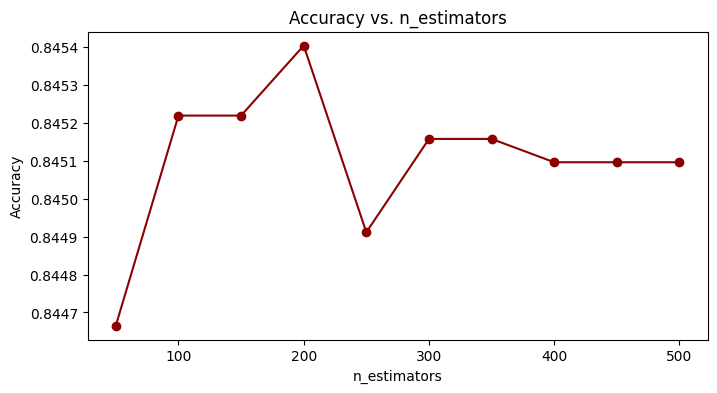

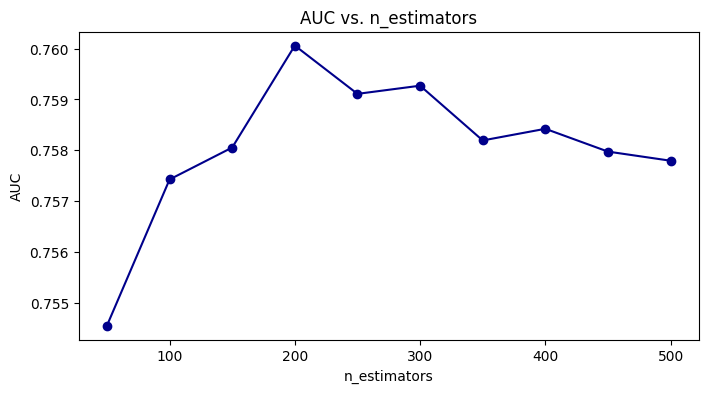

In [147]:
# Assessment of GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier

# Initialize empty lists to store accuracy and AUC results
accuracy_results_GradientB = []
auc_results_GradientB = []

# Define the values of n_estimators to test
n_estimator_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Train a Gradient Boosting classifier for each value of n_estimators
for n_estimators in n_estimator_options:
    model = GradientBoostingClassifier(n_estimators=n_estimators, random_state=101)
    model.fit(train_data, train_labels.values.ravel())

    # Predict labels for the test data and calculate accuracy and AUC scores
    y_pred = model.predict(test_data)
    accuracy = accuracy_score(test_labels, y_pred)
    auc = roc_auc_score(test_labels, y_pred)

    # Append the accuracy and AUC scores to the results lists
    accuracy_results_GradientB.append(accuracy)
    auc_results_GradientB.append(auc)

# Plot the accuracy vs. n_estimators curve
plt.figure(figsize=(8,4))
plt.plot(n_estimator_options, accuracy_results_GradientB, color='darkred', marker='o')
plt.title('Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

# Plot the AUC vs. n_estimators curve
plt.figure(figsize=(8,4))
plt.plot(n_estimator_options, auc_results_GradientB, color='darkblue', marker='o')
plt.title('AUC vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()

[01:47:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[01:47:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[01:47:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[01:47:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[01:47:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

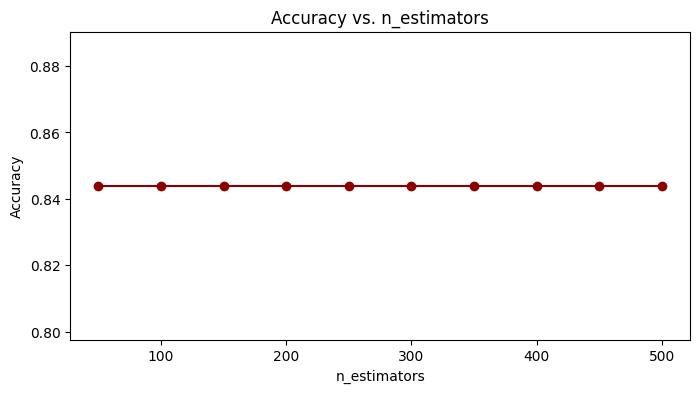

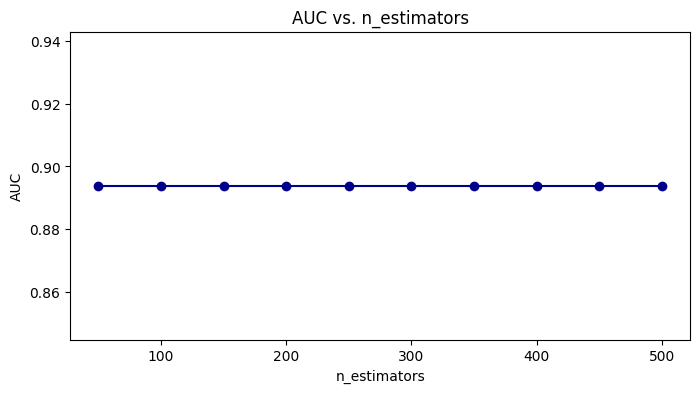

In [148]:
# Assessment of XGBoost, however, must drop since the default   

!pip install xgboost
import xgboost as xgb


# Convert the data and label frames to DMatrix format
dtrain = xgb.DMatrix(train_data, label=train_labels)
dtest = xgb.DMatrix(test_data, label=test_labels)

# Initialize empty lists to store accuracy and AUC results
accuracy_results_xgb = []
auc_results_xgb = []

# Define the values of n_estimators to test
n_estimator_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Set the XGBoost hyperparameters
params = {'objective': 'binary:logistic', 'eval_metric': 'auc', 'seed': 101}

# Train an XGBoost classifier for each value of n_estimators
for n_estimators in n_estimator_options:
    params['n_estimators'] = n_estimators
    model = xgb.train(params, dtrain)

    # Predict labels for the test data and calculate accuracy and AUC scores
    y_pred = model.predict(dtest)
    y_pred_labels = [1 if val >= 0.5 else 0 for val in y_pred]
    accuracy = accuracy_score(test_labels, y_pred_labels)
    auc = roc_auc_score(test_labels, y_pred)

    # Append the accuracy and AUC scores to the results lists
    accuracy_results_xgb.append(accuracy)
    auc_results_xgb.append(auc)

# Plot the accuracy vs. n_estimators curve
plt.figure(figsize=(8,4))
plt.plot(n_estimator_options, accuracy_results_xgb, color='darkred', marker='o')
plt.title('Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

# Plot the AUC vs. n_estimators curve
plt.figure(figsize=(8,4))
plt.plot(n_estimator_options, auc_results_xgb, color='darkblue', marker='o')
plt.title('AUC vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()

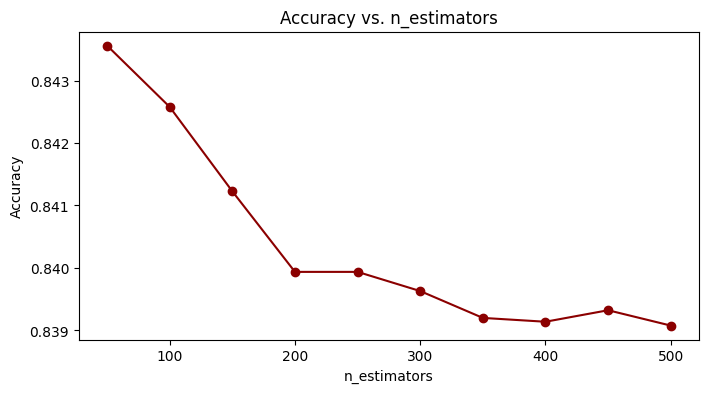

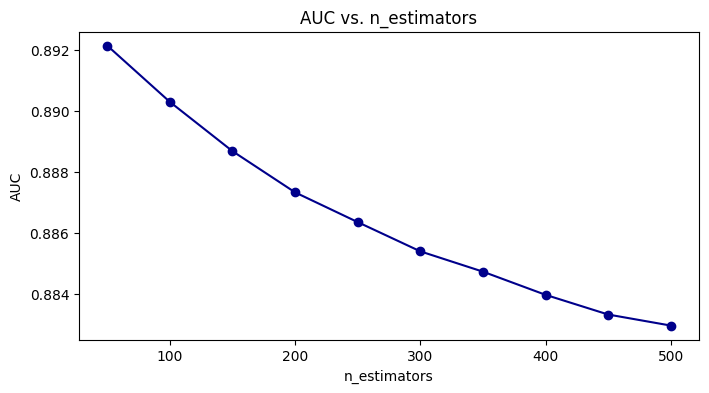

In [149]:
# Assessment of the XGBoost classifier setting all other parameters to their default values.

# Convert the data and label frames to DMatrix format
dtrain = xgb.DMatrix(train_data, label=train_labels)
dtest = xgb.DMatrix(test_data, label=test_labels)

# Initialize empty lists to store accuracy and AUC results
accuracy_results_xgb = []
auc_results_xgb = []

# Define the values of n_estimators to test
n_estimator_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Train an XGBoost classifier for each value of n_estimators
for n_estimators in n_estimator_options:
    model = xgb.train(params={}, dtrain=dtrain, num_boost_round=n_estimators)

    # Predict labels for the test data and calculate accuracy and AUC scores
    y_pred = model.predict(dtest)
    y_pred_labels = np.round(y_pred)
    accuracy = accuracy_score(test_labels, y_pred_labels)
    auc = roc_auc_score(test_labels, y_pred)

    # Append the accuracy and AUC scores to the results lists
    accuracy_results_xgb.append(accuracy)
    auc_results_xgb.append(auc)

# Plot the accuracy vs. n_estimators curve
plt.figure(figsize=(8,4))
plt.plot(n_estimator_options, accuracy_results_xgb, color='darkred', marker='o')
plt.title('Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

# Plot the AUC vs. n_estimators curve
plt.figure(figsize=(8,4))
plt.plot(n_estimator_options, auc_results_xgb, color='darkblue', marker='o')
plt.title('AUC vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()